# Data Exploration


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('talk')
from sklearn.preprocessing import StandardScaler
from corner import corner
from helpers import *

In [2]:
filename = "fmri_data/sub-01_Part1_Average_ROI_n50.csv"
s1p1_data = np.loadtxt(filename, delimiter=",", dtype=float, skiprows=1)
cols = np.loadtxt(filename, delimiter=",", dtype=int, max_rows=1)
print(s1p1_data.shape)
print(cols.shape)

(946, 50)
(50,)


In [3]:
# check that all datasets have the same shape + checking zeros + ranges of each variable (column)
p1_num_rows = 946
p2_num_rows = 1030
num_cols = 50

maxs = []
mins = []

for subject_num in range(1,17):
    if subject_num < 10:
        subject_num = f"0{subject_num}"
    for i in range(1,3):
        filename = f"fmri_data/sub-{subject_num}_Part{i}_Average_ROI_n50.csv"
        data = np.loadtxt(filename, delimiter=",", dtype=float, skiprows=1)
        cols = np.loadtxt(filename, delimiter=",", dtype=int, max_rows=1)
        if i == 1:
            assert data.shape == (p1_num_rows, num_cols) and cols.shape == (num_cols,)
        if i == 2:
            assert data.shape == (p2_num_rows, num_cols) and cols.shape == (num_cols,)
        assert 0 not in data.flatten()
        assert None not in data.flatten()
        
        maxs.append(np.max(data, axis=0))
        mins.append(np.min(data, axis=0))
print("Asserts passed - all datasets have the same shape and no absolute 0s or 'None's\n")

print("Max ranges of each variable (column) over all datasets:\n")
abs_maxs = np.max(np.array(maxs), axis=0)
abs_mins = np.min(np.array(mins), axis=0)
print(abs_maxs - abs_mins)

Asserts passed - all datasets have the same shape and no absolute 0s or 'None's

Max ranges of each variable (column) over all datasets:

[28.721104  23.447835  26.676611  31.396522  28.757744  22.272659
 25.044356  27.330482  20.03872   27.965907  20.712474  30.200053
 25.480324  40.798897  10.8672204 35.028829  29.149988  26.066771
 29.120362  26.837362  19.188986  27.646467  26.067132  25.84106
 22.4496575 19.990548  26.496553  35.200266  20.290612  28.380138
 19.5225565 21.413928  38.273179  24.515058  37.335968  40.876942
 19.443399  33.911361  18.385505  28.718384  21.951049  22.821545
 20.560213  26.221767  33.589783  33.468909  26.521064  21.924855
 17.854664  27.202665 ]


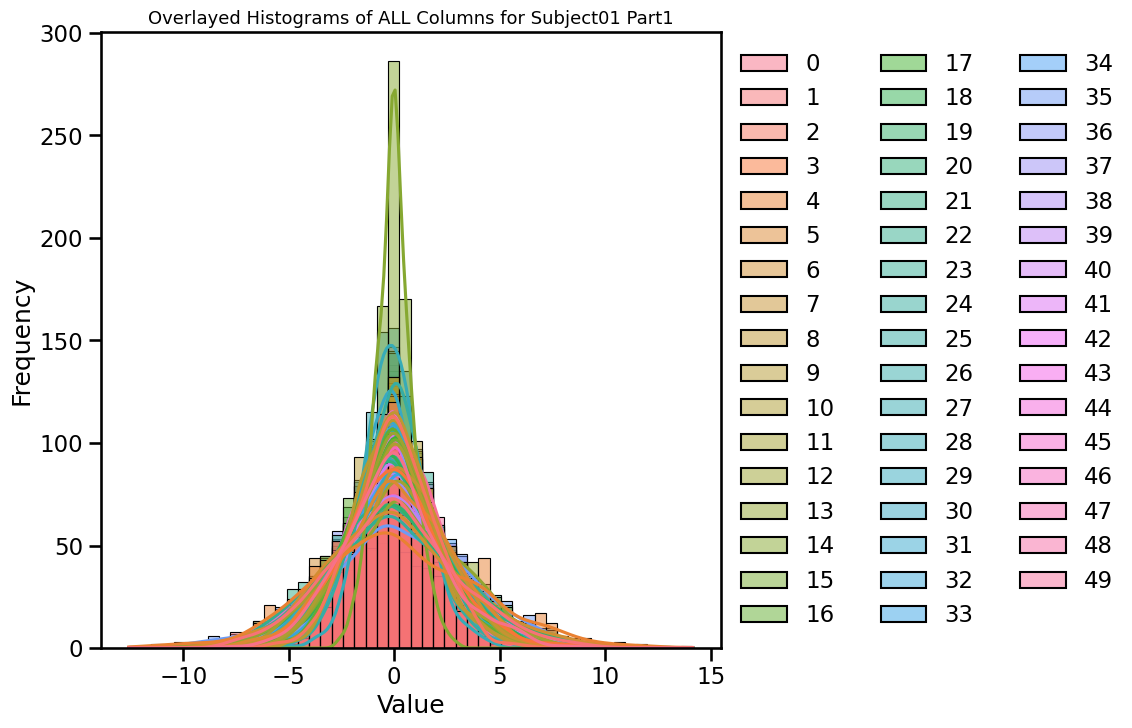

In [4]:
def plot_histogram(data, ax=None, figsize=(8,8), title="Histogram", legend=True):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.histplot(data, bins=50, kde=True, ax=ax, legend=legend)
    if legend:
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1), ncol=3, title=None, frameon=False)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.set_title(title, fontsize=13)

plot_histogram(s1p1_data, title="Overlayed Histograms of ALL Columns for Subject01 Part1")

> Note: sometimes the histogram will be a little different when rerunning the above cell, even without changing the data used. Very weird, can't replicate it consistently.

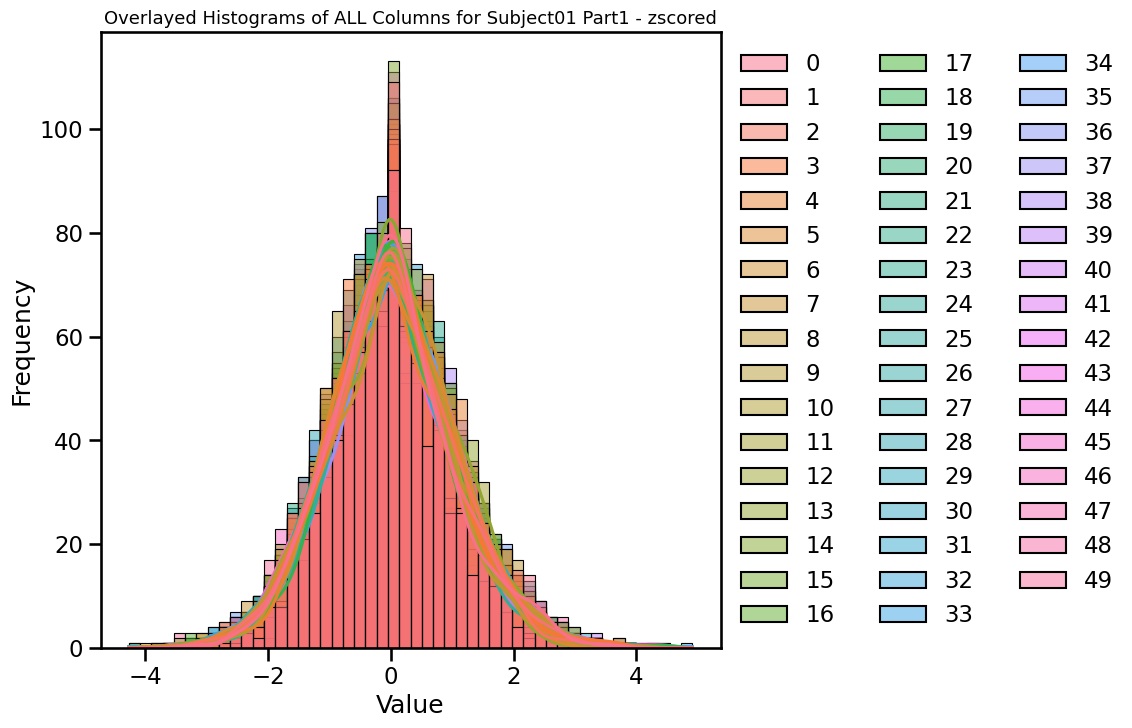

In [5]:
# trying z-scoring
zscored_data = StandardScaler().fit_transform(s1p1_data)
plot_histogram(zscored_data, title="Overlayed Histograms of ALL Columns for Subject01 Part1 - zscored")

## Made function in helpers.py to obtain all data and combined data, where parts for the same subject are combined

In [6]:
all_data, combined_data = get_fmri_data()

combined_data_len = 946 + 1030

for data in combined_data.values():
    assert data.shape[0] == combined_data_len

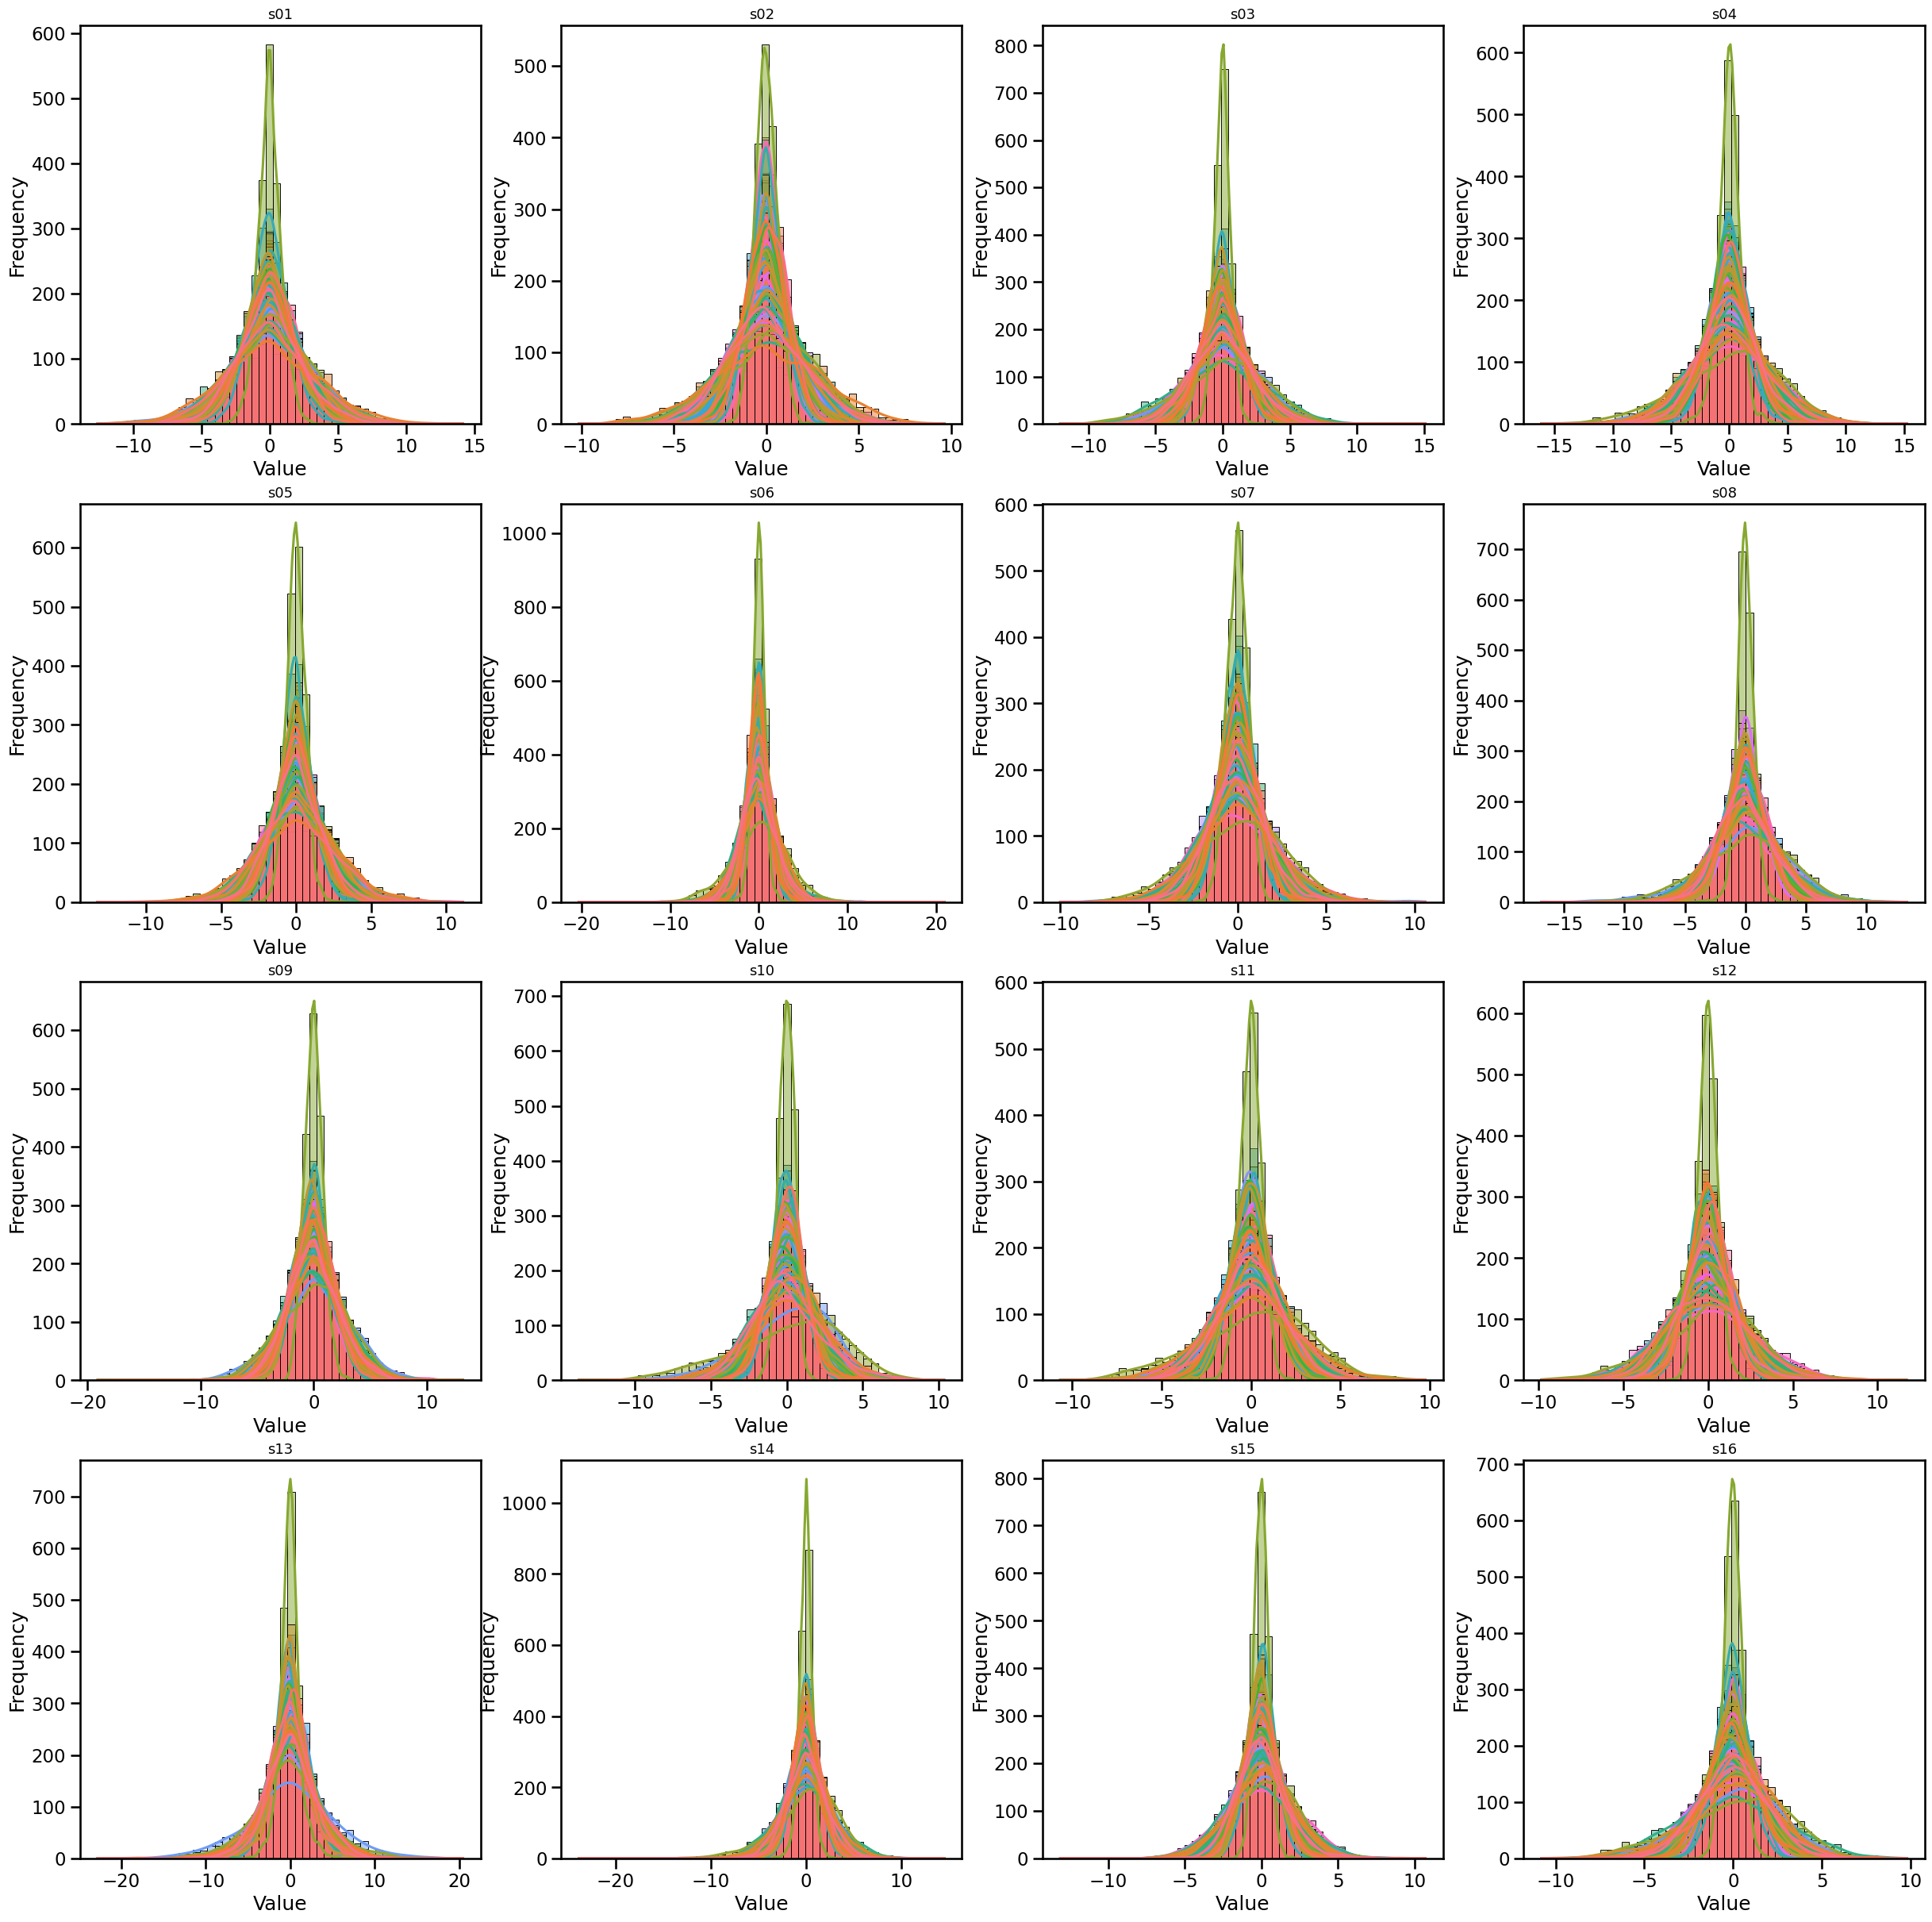

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(30,30))
for i, (key, data) in enumerate(combined_data.items()):
    ax = axs.flatten()[i]
    plot_histogram(data, ax=ax, title=f"{key}", legend=False)

> The distributions look pretty reasonable, z-scoring probably not needed

> Question: should I be using combined data or part1/part2 data separately?

# Histogram of ROIs (Columns)

In [8]:
concat_rois = {i:[] for i in range(50)}

for data in combined_data.values():
    for i in range(50):
        concat_rois[i] += list(data[:,i])
for i in range(50):
    concat_rois[i] = np.array(concat_rois[i])

print(concat_rois[0].shape)
print(f"Expected len (946 + 1030)*16 = {(946+1030)*16}")

(31616,)
Expected len (946 + 1030)*16 = 31616


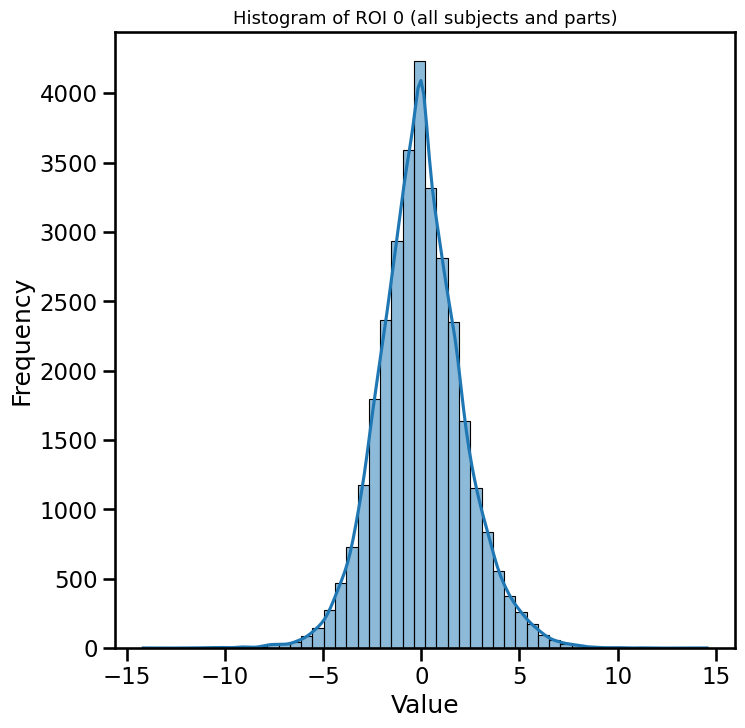

In [9]:
plot_histogram(concat_rois[0], title="Histogram of ROI 0 (all subjects and parts)", legend=False)

In [10]:
# Histogram of variance of each ROI over each subject
sub_variances = []
for sub_data in combined_data.values():
    sub_variances.append(np.var(sub_data, axis=0))
roi_variances = np.transpose(np.array(sub_variances))

In [11]:
def plot_roi_var(roi_num, ax=None, figsize=(5,5)):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    _ = ax.scatter([i for i in range(16)], roi_variances[roi_num], c='red')

    _ = ax.set_xticks(range(0,16,3))
    ax.xaxis.set_tick_params(labelsize=10)
    ax.set_ylim(0, 30)
    ax.yaxis.set_tick_params(labelsize=10)

    _ = ax.set_xlabel("Subject num", fontsize=12)
    _ = ax.set_ylabel("Variance", fontsize=12)
    _ = ax.set_title(f"Variance of ROI {roi_num} over each subject", fontsize=13)
    ax.grid(False)
    ax.set_box_aspect(1)

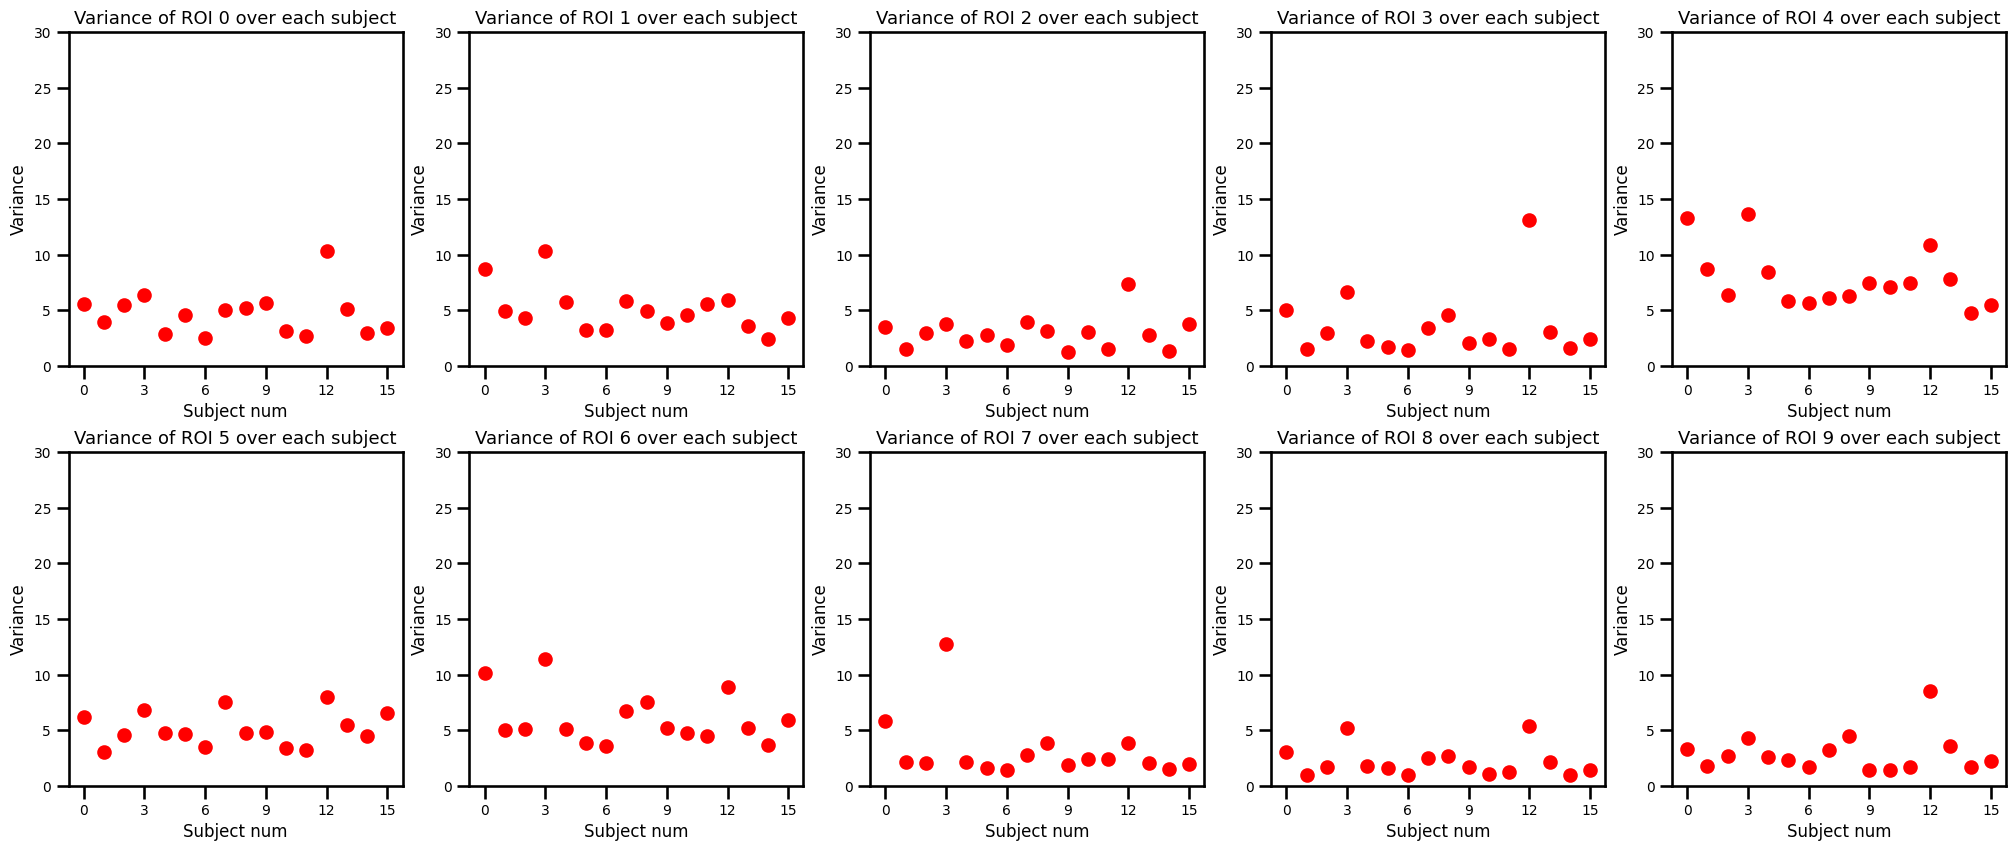

In [12]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for i in range(10):
    ax = axs.flatten()[i]
    plot_roi_var(i, ax=ax)

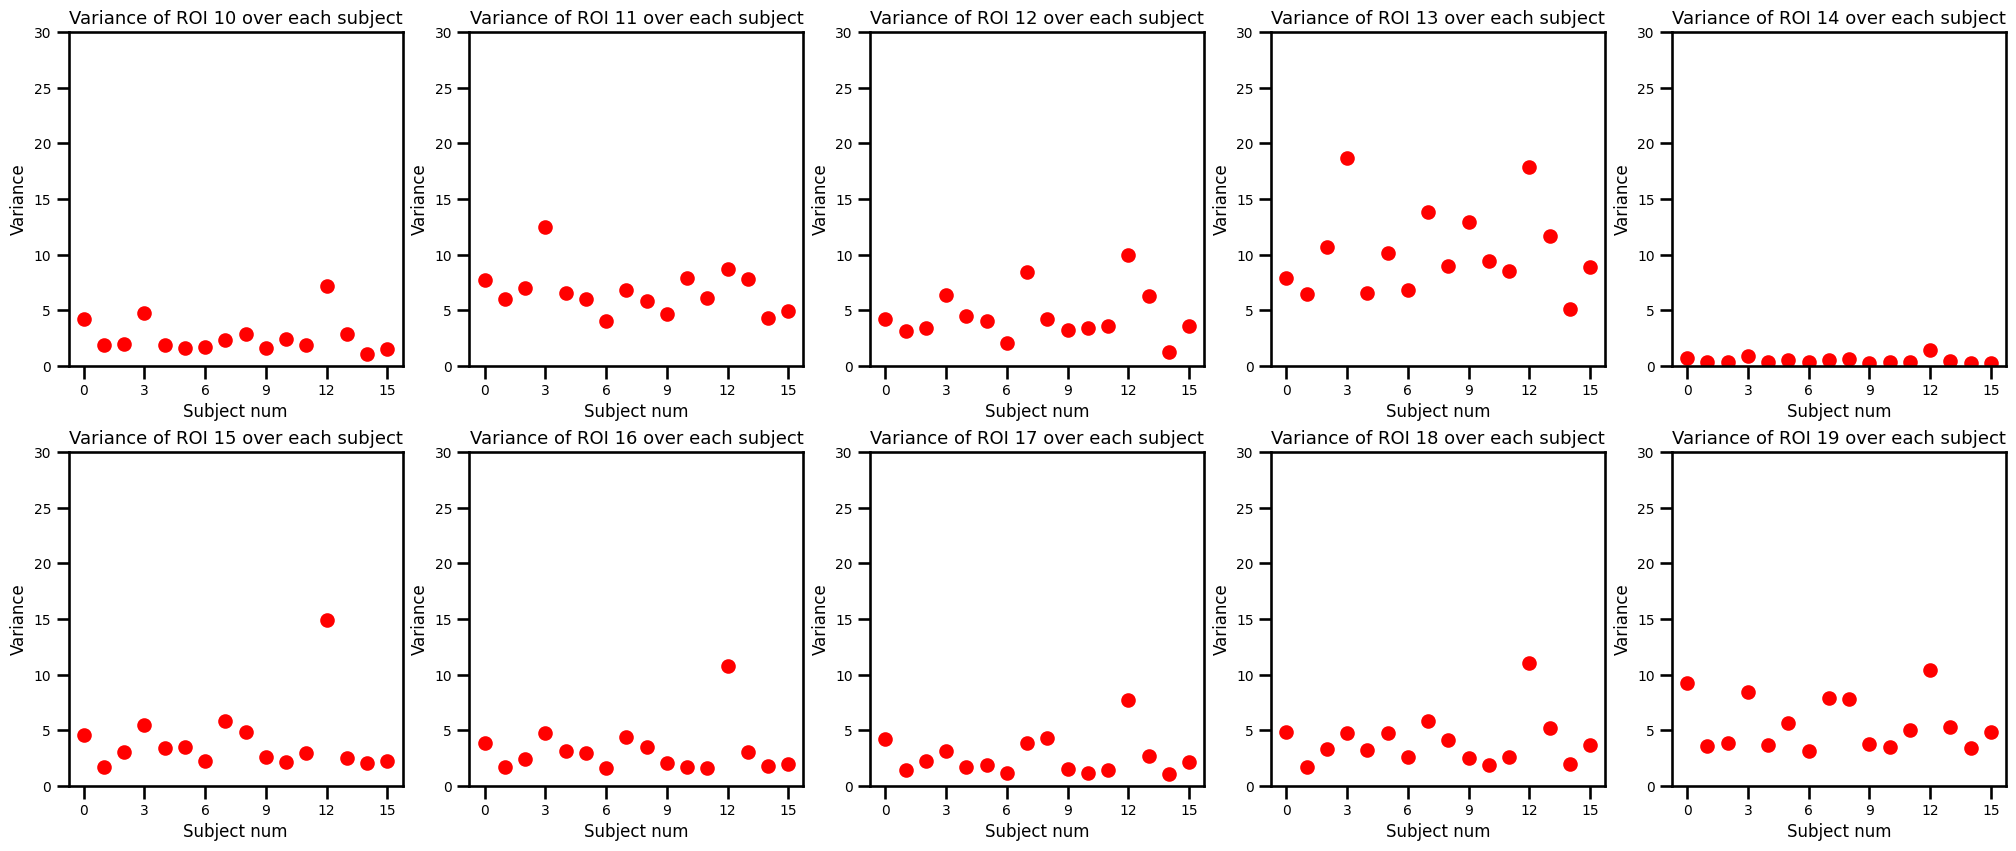

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for i in range(10, 20):
    ax = axs.flatten()[i-10]
    plot_roi_var(i, ax=ax)

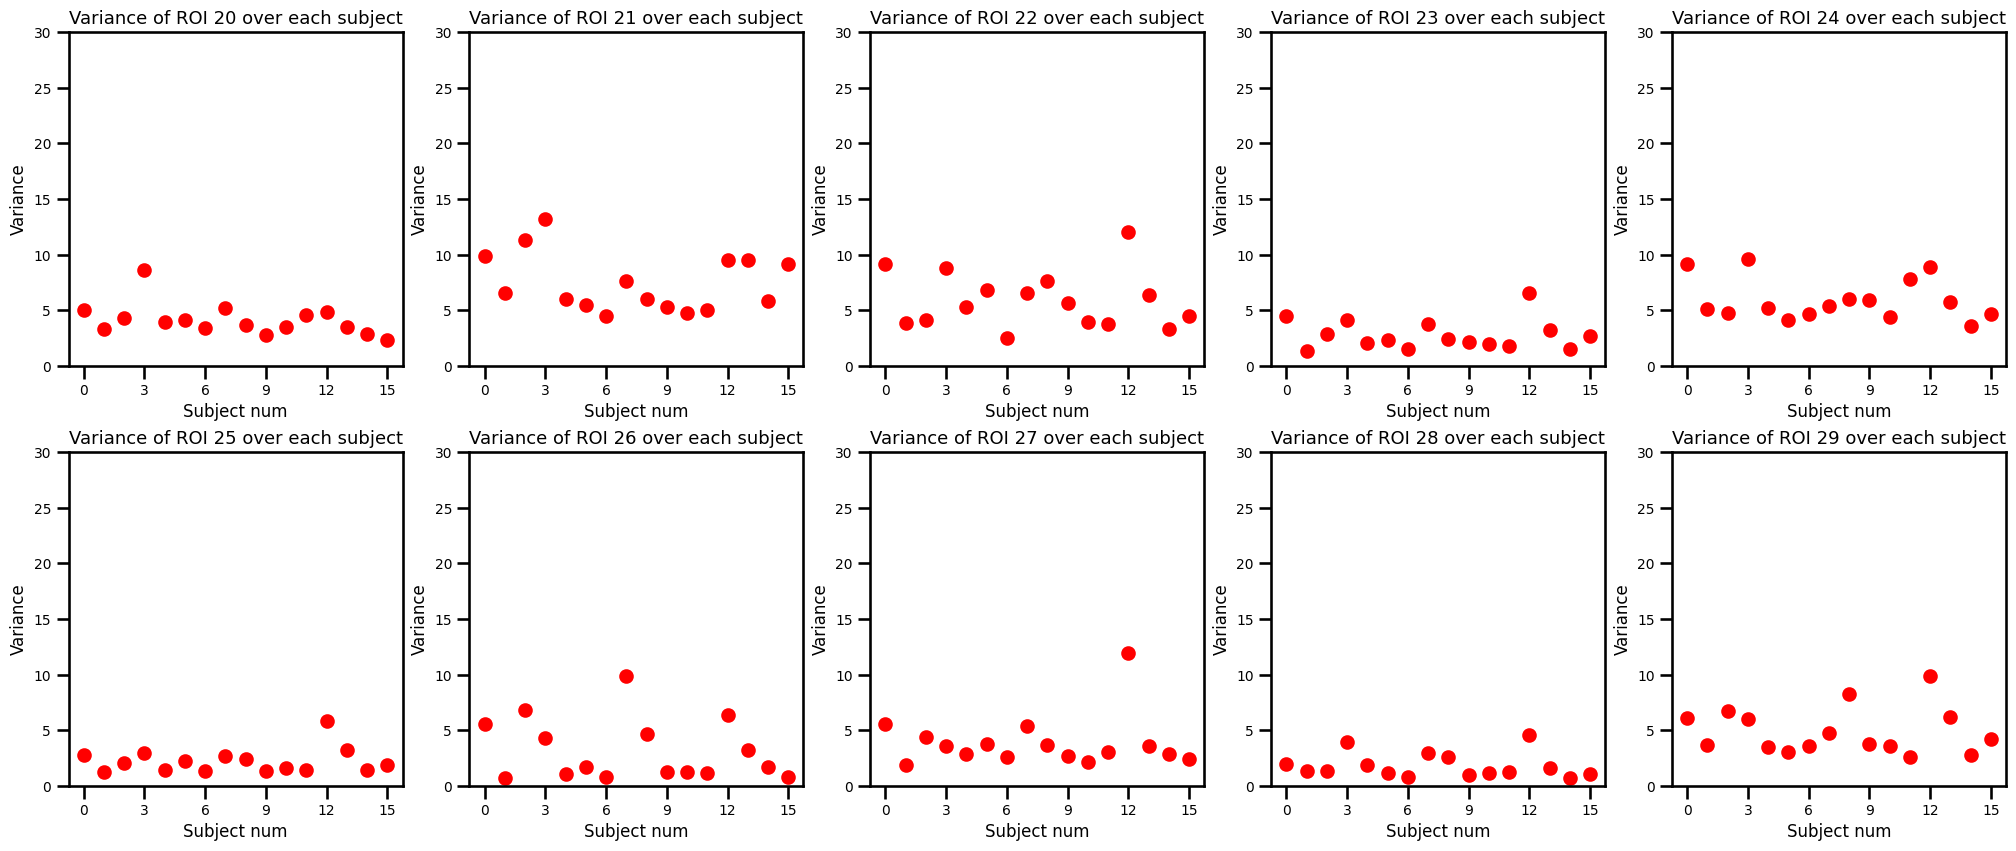

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for i in range(20, 30):
    ax = axs.flatten()[i-20]
    plot_roi_var(i, ax=ax)

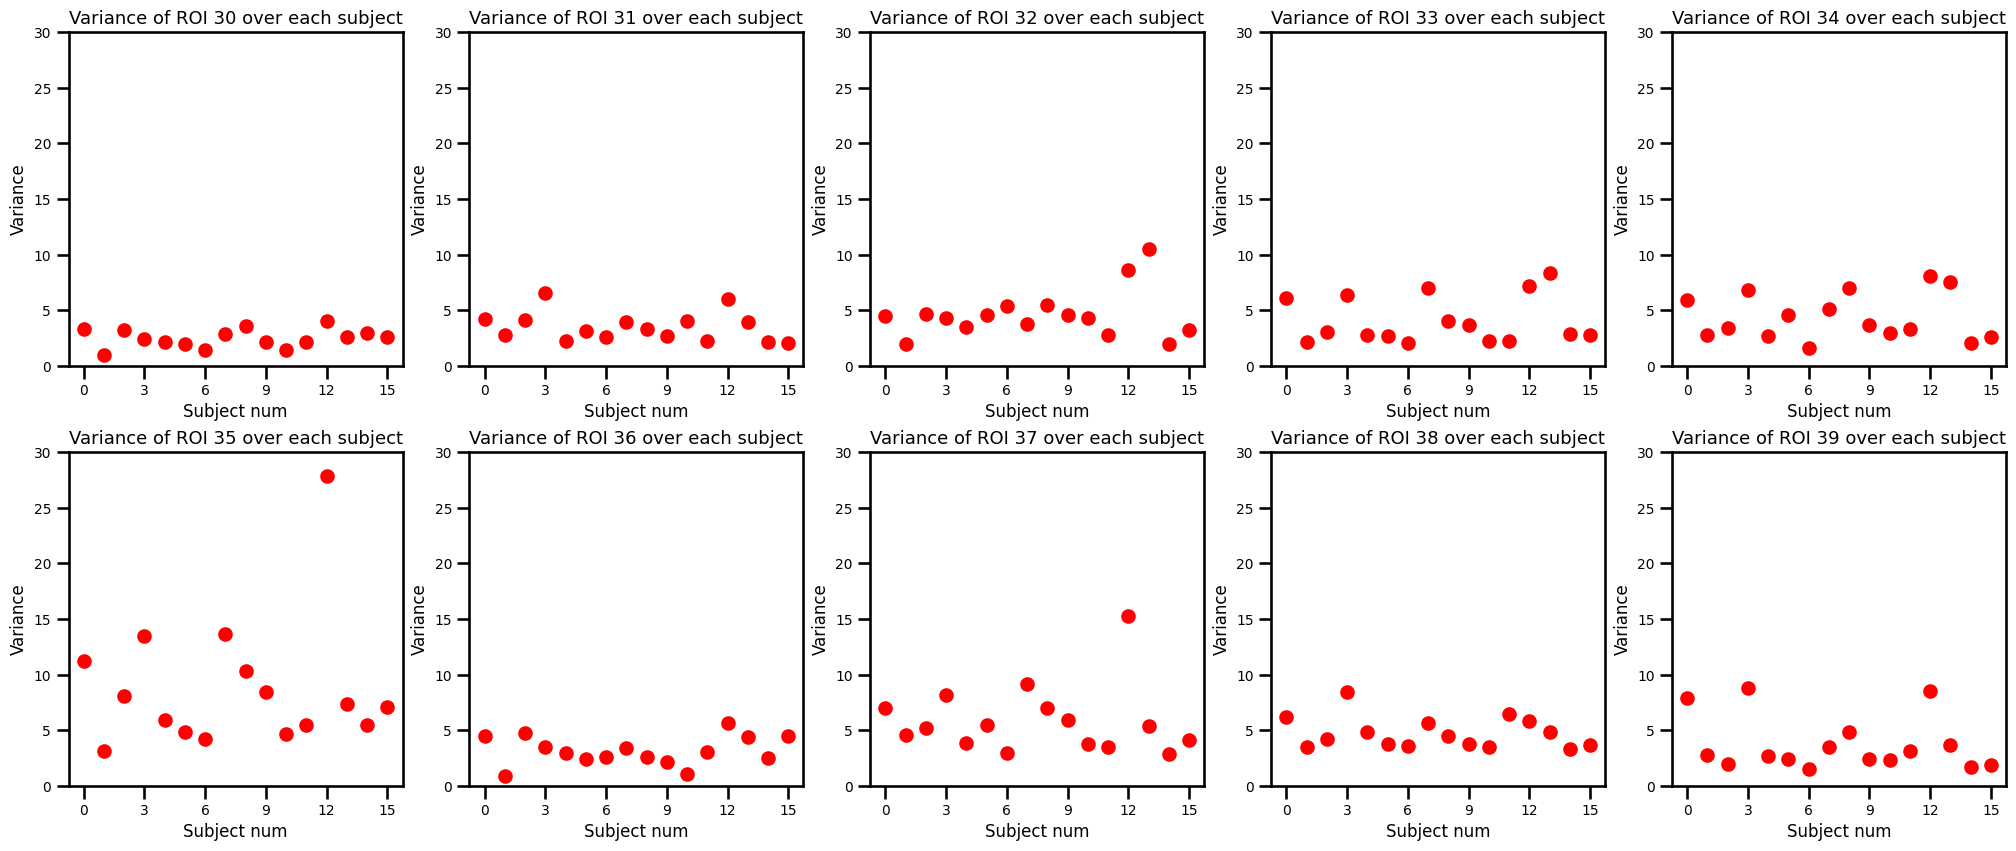

In [15]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for i in range(30, 40):
    ax = axs.flatten()[i-30]
    plot_roi_var(i, ax=ax)

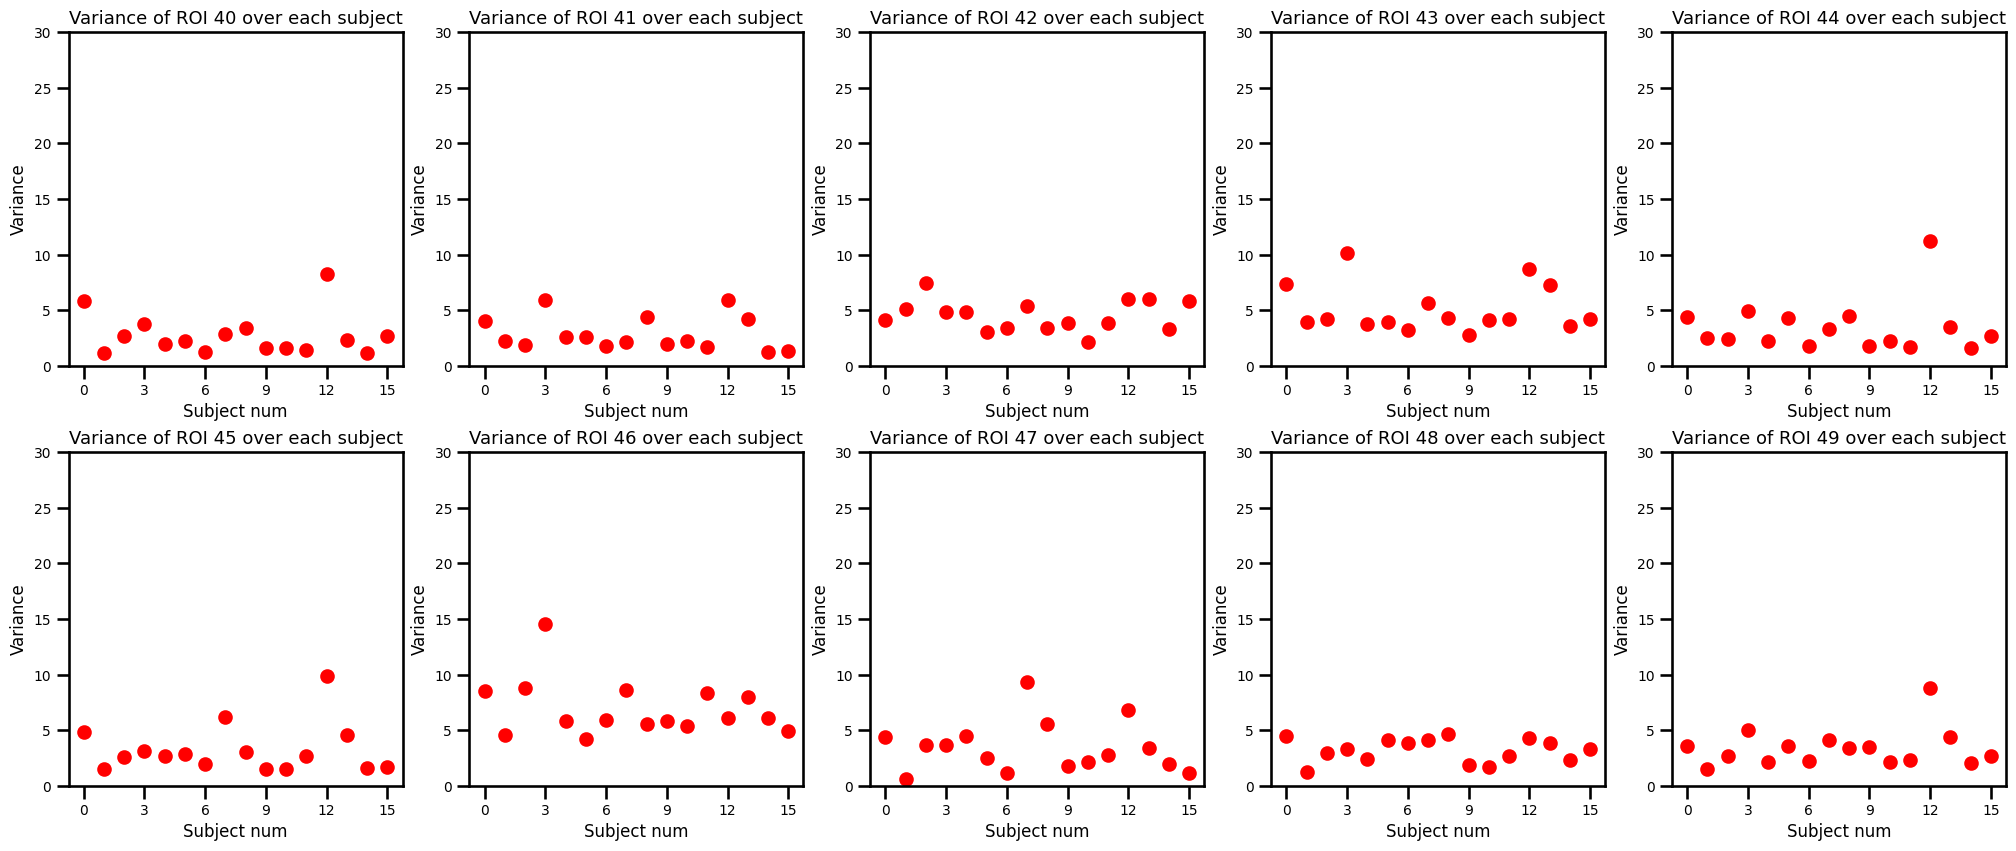

In [16]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
axs = axs.flatten()
for i in range(40, 50):
    ax = axs.flatten()[i-40]
    plot_roi_var(i, ax=ax)

In [17]:
import numpy as np
from nilearn import image
from nilearn.image import load_img
from scipy import ndimage

In [18]:
# Load the parcellation NIfTI image
parcellation_img = load_img('k50_2mm.nii.gz')
# Get the data array from the image
parcellation_data = parcellation_img.get_fdata()
# Get unique ROI labels (excluding 0 if it’s background)
roi_labels = np.unique(parcellation_data)
roi_labels = roi_labels[roi_labels != 0]  # Remove background if present

# Initialize a dictionary to hold the voxel counts for each ROI
unrounded_voxel_counts = {}
# Count voxels for each ROI
for roi in roi_labels:
    unrounded_voxel_counts[roi] = np.sum(parcellation_data == roi)

voxel_counts = {round(roi): count for roi, count in unrounded_voxel_counts.items()}

> ROI numbers from the .gz image range from 1-50 while the range is 0-49 from the raw data

In [19]:
stacked_combined_data = np.vstack(list(combined_data.values()))

In [ ]:
corr = np.corrcoef(stacked_combined_data.T)
np.fill_diagonal(corr, 0)
bound = np.max(np.abs(corr))

fig = plt.figure(figsize=(30,30))
plt.imshow(corr, cmap='seismic', vmin=-bound, vmax=bound, interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix (All Data Combined)', fontsize=30)
plt.show()